[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/MauricioRR-Tec/AprendizajeAutomatico/blob/master/Tema_4_AprendizajeAutomatico/notebook/ML_04_EnsembleModels.ipynb)


In [24]:
!pip install graphviz

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import graphviz

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_graphviz
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from tensorflow.keras.datasets import mnist

# Load data

In [2]:
# Load data
iris = load_iris()
X = iris.data[:, :2]
Y = iris.target

# Split train - test
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(120, 2)
(30, 2)
(120,)
(30,)


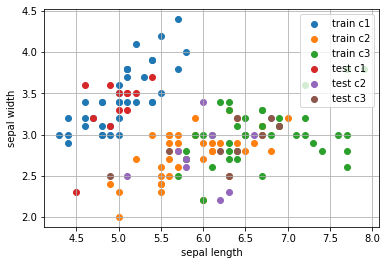

In [3]:
# Plot two features: petal length and petal width
plt.figure(figsize=(6, 4))
plt.scatter(x_train[y_train==0, 0], x_train[y_train==0, 1], label="train c1")
plt.scatter(x_train[y_train==1, 0], x_train[y_train==1, 1], label="train c2")
plt.scatter(x_train[y_train==2, 0], x_train[y_train==2, 1], label="train c3")
plt.scatter(x_test[y_test==0, 0], x_test[y_test==0, 1], label="test c1")
plt.scatter(x_test[y_test==1, 0], x_test[y_test==1, 1], label="test c2")
plt.scatter(x_test[y_test==2, 0], x_test[y_test==2, 1], label="test c3")
plt.legend()
plt.grid(True)
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.show()

In [19]:

# Try with the mnist dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)


11493376/11490434 [==============================] - 2s 0us/step
(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


[5 0 4 1 9 2 1 3 1 4 3 5 3 6 1 7 2 8 6 9]


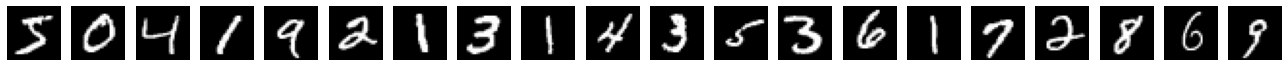

In [20]:

# Show examples
print(y_train[:20])

plt.figure(figsize=(18, 3))
for ind in range(20):
  plt.subplot(1, 20, ind+1)
  plt.imshow(x_train[ind], cmap='gray')
  plt.axis('off')
plt.tight_layout()
plt.show()


In [21]:

# Reshape data
x_train = x_train.reshape((len(x_train), -1))
x_test = x_test.reshape((len(x_test), -1))

print(x_train.shape)
print(x_test.shape)


(60000, 784)
(10000, 784)


# Decision trees

In [22]:
# Create a decision tree classifier and train it
cl1 = DecisionTreeClassifier(max_depth=3).fit(x_train, y_train)

print(f"Training mean accuracy: {cl1.score(x_train, y_train):6.4f}")
print(f"Test mean accuracy: {cl1.score(x_test, y_test):6.4f}")

Training mean accuracy: 0.4915
Test mean accuracy: 0.4953


[Text(167.4, 190.26, 'X[350] <= 131.5\ngini = 0.9\nsamples = 60000\nvalue = [5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851\n5949]'),
 Text(83.7, 135.9, 'X[568] <= 0.5\ngini = 0.881\nsamples = 39160\nvalue = [5433, 623, 4772, 1312, 5353, 3266, 4775, 5773, 3081\n4772]'),
 Text(41.85, 81.53999999999999, 'X[430] <= 0.5\ngini = 0.839\nsamples = 24084\nvalue = [697, 414, 904, 847, 5133, 1668, 2771, 5568, 1439\n4643]'),
 Text(20.925, 27.180000000000007, 'gini = 0.705\nsamples = 9667\nvalue = [258, 404, 565, 424, 503, 503, 315, 4974, 836, 885]'),
 Text(62.775000000000006, 27.180000000000007, 'gini = 0.788\nsamples = 14417\nvalue = [439, 10, 339, 423, 4630, 1165, 2456, 594, 603, 3758]'),
 Text(125.55000000000001, 81.53999999999999, 'X[435] <= 0.5\ngini = 0.793\nsamples = 15076\nvalue = [4736, 209, 3868, 465, 220, 1598, 2004, 205, 1642\n129]'),
 Text(104.625, 27.180000000000007, 'gini = 0.403\nsamples = 6018\nvalue = [4596, 11, 476, 155, 36, 436, 198, 18, 66, 26]'),
 Text(146.475, 27.1800

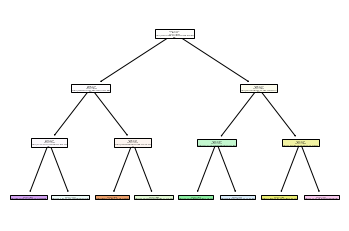

In [28]:
from sklearn import tree
tree.plot_tree(cl1,
               filled = True)

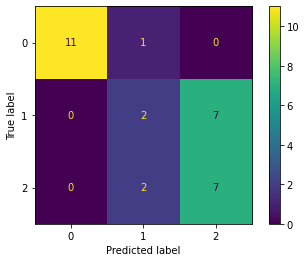

In [10]:
# Cofusion matrix
y_test_hat = cl1.predict(x_test)
CM = confusion_matrix(y_test, y_test_hat, labels=cl1.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=CM, display_labels=cl1.classes_)
disp.plot()

# Random forest

In [11]:
# Create a random forest
cl2 = RandomForestClassifier(max_depth=3).fit(x_train, y_train)

print(f"Training mean accuracy: {cl2.score(x_train, y_train):6.4f}")
print(f"Test mean accuracy: {cl2.score(x_test, y_test):6.4f}")

Training mean accuracy: 0.8333
Test mean accuracy: 0.7667


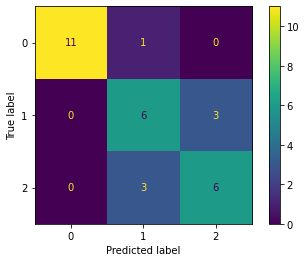

In [12]:
# Confusion matrix
y_test_hat = cl2.predict(x_test)
CM = confusion_matrix(y_test, y_test_hat, labels=cl2.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=CM, display_labels=cl2.classes_)
disp.plot()

# Bagging

In [13]:
# Define a dictionary for grid search
params = {'base_estimator': [DecisionTreeClassifier(), KNeighborsClassifier()],
          'n_estimators': [20, 50],
          'max_samples': [0.5, 1.0],
          'max_features': [0.1, 0.5]}

In [14]:
# Create a bagging meta-model, and train it
bagging_classifier_grid = GridSearchCV(BaggingClassifier(n_jobs=-1), param_grid =params, verbose=1)
bagging_classifier_grid.fit(x_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:    5.8s finished


GridSearchCV(estimator=BaggingClassifier(n_jobs=-1),
             param_grid={'base_estimator': [DecisionTreeClassifier(),
                                            KNeighborsClassifier()],
                         'max_features': [0.1, 0.5], 'max_samples': [0.5, 1.0],
                         'n_estimators': [20, 50]},
             verbose=1)

In [15]:
# Print info about best score and best hyperparameters
print(f"Best score: {bagging_classifier_grid.best_score_:.4f}")
print(f"Best params: {bagging_classifier_grid.best_params_}")

Best score: 0.7750
Best params: {'base_estimator': KNeighborsClassifier(), 'max_features': 0.5, 'max_samples': 0.5, 'n_estimators': 20}


In [16]:
# Extract best estimator
best_clf = bagging_classifier_grid.best_estimator_

print(f"Training mean accuracy: {best_clf.score(x_train, y_train):6.4f}")
print(f"Test mean accuracy: {best_clf.score(x_test, y_test):6.4f}")

Training mean accuracy: 0.7833
Test mean accuracy: 0.8333


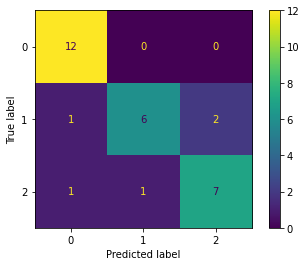

In [17]:
# Confusion matrix
y_test_hat = best_clf.predict(x_test)
CM = confusion_matrix(y_test, y_test_hat, labels=best_clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=CM, display_labels=best_clf.classes_)
disp.plot()

In [99]:
#
#1) Encuentra la combinación de hiperparámetros que te de mejor desempeño.
#2) Prueba usando las 4 variables de la base de datos iris.
#3) Ahora intenta con la base de datos mnist.